In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
data = pd.read_csv("data/wbes_sintetico.csv")

cols = [
    "employees",
    "firm_age_years",
    "training",
    "access_finance",
    "exporter",
    "competition_level",
    "digital_payments",
    "sales_annual_usd"
]

df = data[cols]
df = df.dropna()

df.head()


,employees,firm_age_years,training,access_finance,exporter,competition_level,digital_payments,sales_annual_usd
0,13.0,10.0,1.0,1.0,0,Media,1,42879.327130
1,9.0,6.0,0.0,0.0,0,Baja,1,54570.897174
2,15.0,10.0,0.0,0.0,1,Baja,1,56311.260030
3,25.0,12.0,1.0,0.0,1,Baja,1,93419.359675
4,9.0,9.0,0.0,0.0,0,Baja,0,24608.889361


In [21]:
X = df[[
    "employees",
    "firm_age_years",
    "training",
    "access_finance",
    "exporter",
    "digital_payments"
]].values

y = df["sales_annual_usd"].values.reshape(-1,1)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [23]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)


In [25]:
print("Coeficientes:\n", regressor.coef_)
print("Término independiente:\n", regressor.intercept_)

print("MSE entrenamiento: %.2f" % mean_squared_error(Y_train, y_pred_train))
print("MSE prueba: %.2f" % mean_squared_error(Y_test, y_pred_test))

print("R2 entrenamiento: %.2f" % r2_score(Y_train, y_pred_train))
print("R2 prueba: %.2f" % regressor.score(X_test, Y_test))


Coeficientes:
 [[1064.81274888  541.37907543 6555.02153654 9345.57831179 6099.73416481
  2885.05749404]]
Término independiente:
 [2804.66560701]
MSE entrenamiento: 158339990.56
MSE prueba: 170957118.84
R2 entrenamiento: 0.45
R2 prueba: 0.46


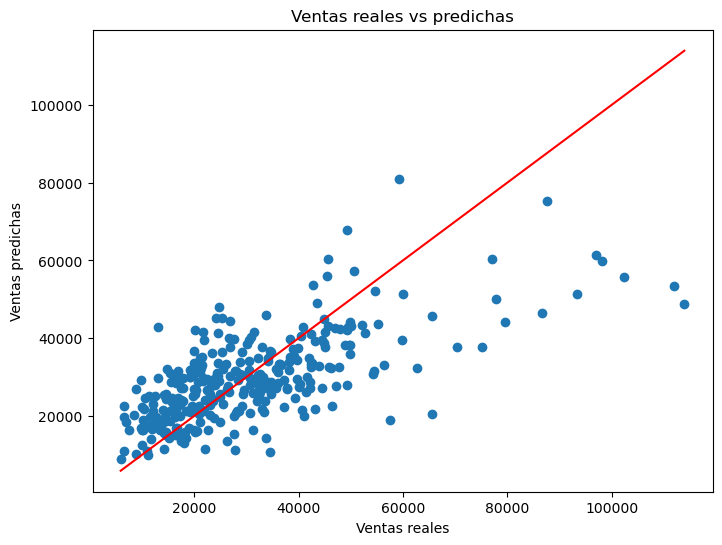

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_pred_test)

plt.plot(
    [Y_test.min(), Y_test.max()],
    [Y_test.min(), Y_test.max()],
    'r'
)

plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Ventas reales vs predichas")
plt.show()

Sí, es posible clasificar si una empresa es exitosa según sus características estructurales

Al definir como exitosa a aquella con ventas superiores al promedio y entrenar un modelo de regresión logística con variables como empleados, capacitación, acceso a financiamiento, exportación y nivel de competencia, el modelo obtuvo un buen desempeño (AUC ≈ 0.83), lo que indica adecuada capacidad de discriminación

Los principales patrones asociados al éxito empresarial son mayor número de empleados, acceso a financiamiento y participación en exportaciones, mientras que menor escala y falta de financiamiento se relacionan con mayor probabilidad de fracaso